In [2]:
#European Roulette
r_nums=list(range(37))
red = {
    1,3,5,7,9,12,14,16,18,
    19,21,23,25,27,30,32,34,36
}
black = set(r_nums)-red-{0}
green = {0}


In [3]:
#Random spinning
import numpy as np

def spin_wheel():
    return np.random.choice(r_nums)


In [4]:


# 1. Straight Bet
def straight_bet(spin, bet_number, amount):
    """Bet on a single number"""
    if spin == bet_number:
        return 35 * amount
    return -amount

# 2. Split Bet
def evaluate_split_bet(spin, bet_numbers, amount):
    """Bet on two adjacent numbers"""
    return 17 * amount if spin in bet_numbers else -amount

# 3. Street Bet
def evaluate_street_bet(spin, row_start, amount):
    """Bet on 3 numbers in a row: row_start, row_start+1, row_start+2"""
    return 11 * amount if spin in [row_start, row_start + 1, row_start + 2] else -amount

# 4. Corner Bet
def evaluate_corner_bet(spin, corner_numbers, amount):
    """Bet on 4 numbers in a square"""
    return 8 * amount if spin in corner_numbers else -amount

# 5. Red/Black Bet
def evaluate_red_black_bet(spin, color, amount):
    """Bet on red or black"""
    if spin == 0:
        return -amount
    if color == 'red' and spin in red:
        return amount
    elif color == 'black' and spin in black:
        return amount
    return -amount

# 6. Odd/Even Bet
def evaluate_odd_even_bet(spin, parity, amount):
    """Bet on odd or even"""
    if spin == 0:
        return -amount
    elif parity == 'odd' and spin % 2 == 1:
        return amount
    elif parity == 'even' and spin % 2 == 0:
        return amount
    return -amount

# 7. Low/High Bet
def evaluate_low_high_bet(spin, range_type, amount):
    """Bet on 1–18 or 19–36"""
    if spin == 0:
        return -amount
    if range_type == 'low' and 1 <= spin <= 18:
        return amount
    elif range_type == 'high' and 19 <= spin <= 36:
        return amount
    return -amount

# 8. Dozen Bet
def evaluate_dozen_bet(spin, dozen, amount):
    """Bet on one of the 3 dozens"""
    if spin == 0:
        return -amount
    if dozen == 1 and 1 <= spin <= 12:
        return 2 * amount
    elif dozen == 2 and 13 <= spin <= 24:
        return 2 * amount
    elif dozen == 3 and 25 <= spin <= 36:
        return 2 * amount
    return -amount

# 9. Column Bet
def evaluate_column_bet(spin, column, amount):
    """Bet on one of the 3 vertical columns"""
    if spin == 0:
        return -amount
    column1 = {1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34}
    column2 = {2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35}
    column3 = {3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36}

    if column == 1 and spin in column1:
        return 2 * amount
    elif column == 2 and spin in column2:
        return 2 * amount
    elif column == 3 and spin in column3:
        return 2 * amount
    return -amount


In [5]:
#To make a player
class Player:
    def __init__(self,bankroll):
        self.bankroll = bankroll
        self.history = [bankroll]
        self.bets = []
        self.secured_profit = 0
    def place_bet(self,outcome,description=""):
        self.bankroll +=outcome
        self.history.append(self.bankroll)
        self.bets.append((description,outcome))

    def stats(self):
        wins=0
        losses=0
        for desc,res in self.bets:
            if res>0:
                wins+=1
        for desc,res in self.bets:
            if res<=0:
                losses+=1
        return {
        "Starting Bankroll": self.history[0],
        "Final Bankroll": self.bankroll,
        "Total Bets": len(self.bets),
        "Wins": wins,
        "Losses": losses
    }

In [6]:
#Testing player
player = Player(bankroll = 1000)
#Simulating 3 bets
for i in range(3):
    spin = spin_wheel()
    result = evaluate_red_black_bet(spin,'red',10)
    desc = f"Spin {i+1}={spin}, Bet on red"
    player.place_bet(result,desc)
print(player.bankroll)
print(player.stats())

1010
{'Starting Bankroll': 1000, 'Final Bankroll': 1010, 'Total Bets': 3, 'Wins': 2, 'Losses': 1}


In [7]:
#Ok so when we do this we make 10 rupees ie we win 2 times and loose 1 time

In [8]:
#Now we will try some simple strategy

In [64]:
def flat_betting(player, n_rounds=100, amount=10, bet_type='red', verbose=False):
    """
    Bet a fixed amount on red/black for each spin.
    
    Parameters:
    - player: Player object with bankroll
    - n_rounds: number of spins
    - amount: fixed bet amount
    - bet_type: 'red' or 'black'
    - verbose: if True, print only first 10 rounds
    """
    for i in range(n_rounds):
        if player.bankroll < amount:
            if verbose and i < 10:
                print(f"💸 Spin {i+1}: Insufficient bankroll (₹{player.bankroll}) for ₹{amount}, stopping.")
            break

        spin = spin_wheel()
        result = evaluate_red_black_bet(spin, bet_type, amount)
        desc = f"Spin {i+1}: Bet ₹{amount} on {bet_type}, Spin = {spin}"
        player.place_bet(result, desc)

        if verbose and i < 10:
            outcome = "✅ Win" if result > 0 else "❌ Loss"
            print(f"{outcome} → {desc}, Result = ₹{result}")


In [65]:
player = Player(bankroll = 1000)
flat_betting(player,n_rounds=100,amount=10,bet_type='red')
print(player.stats())

{'Starting Bankroll': 1000, 'Final Bankroll': 1060, 'Total Bets': 100, 'Wins': 53, 'Losses': 47}


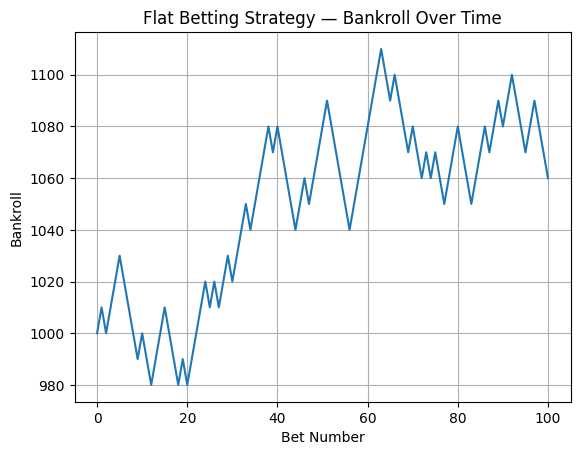

In [66]:
#To visulise teh bets
import matplotlib.pyplot as plt

plt.plot(player.history)
plt.title("Flat Betting Strategy — Bankroll Over Time")
plt.xlabel("Bet Number")
plt.ylabel("Bankroll")
plt.grid(True)
plt.show()


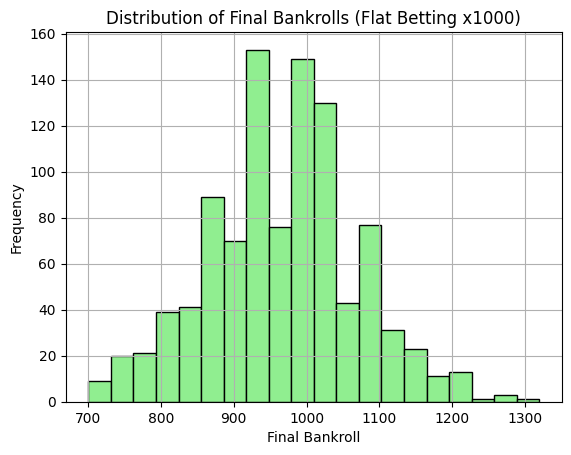

In [67]:
#Lets plot 1000 such bets
final_bankrolls = []
win_counts = []

for _ in range(1000):
    player = Player(bankroll=1000)
    flat_betting(player, n_rounds=100, amount=10, bet_type='red')
    stats = player.stats()
    final_bankrolls.append(stats['Final Bankroll'])
    win_counts.append(stats['Wins'])

# Plot bankroll distribution
plt.hist(final_bankrolls, bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Final Bankrolls (Flat Betting x1000)")
plt.xlabel("Final Bankroll")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [68]:
#Lets find on avg , min max all that
import numpy as np

print("Average Final Bankroll:", np.mean(final_bankrolls))
print("Minimum:", np.min(final_bankrolls))
print("Maximum:", np.max(final_bankrolls))
print("Standard Deviation:", np.std(final_bankrolls))


Average Final Bankroll: 966.26
Minimum: 700
Maximum: 1320
Standard Deviation: 102.56906161216452


In [69]:
#Lets test diff betting sizes 
amounts = [5, 10, 20, 50]
for amt in amounts:
    results = []
    for _ in range(500):
        player = Player(bankroll=1000)
        flat_betting(player, n_rounds=100, amount=amt, bet_type='red')
        stats = player.stats()
        results.append(stats['Final Bankroll'])
    print(f"Avg bankroll after betting ₹{amt} = {np.mean(results):.2f}")


Avg bankroll after betting ₹5 = 987.74
Avg bankroll after betting ₹10 = 973.56
Avg bankroll after betting ₹20 = 953.44
Avg bankroll after betting ₹50 = 856.60


In [70]:
#Simulation func to run any simulation we make
def simulation(strategy,n_simulations=500):
    profits = []
    final_bankrolls = []
    for i in range(n_simulations):
        player=Player(bankroll=1000)
        strategy(player)
        profits.append(player.bankroll + player.secured_profit)
        final_bankrolls.append(player.bankroll)
    return profits,final_bankrolls

In [72]:
def martingale_strategy(player, base_bet=10, max_bet=640, max_rounds=100, verbose=False):
    """
    Martingale strategy – doubles bet after every loss, resets after win.
    Secures +1 unit profit per win cycle.

    Parameters:
    - player: Player object
    - base_bet: initial betting amount
    - max_bet: max bet allowed
    - max_rounds: max spins
    - verbose: if True, print only first 10 rounds
    """
    bet_amount = base_bet
    player.secured_profit = 0

    for i in range(max_rounds):
        if bet_amount > max_bet:
            if verbose and i < 10:
                print(f"⚠️ Round {i+1}: Exceeded table limit (₹{bet_amount}), stopping.")
            break

        if player.bankroll < bet_amount:
            if verbose and i < 10:
                print(f"💸 Round {i+1}: Not enough bankroll (₹{player.bankroll}) for ₹{bet_amount}, stopping.")
            break

        spin = spin_wheel()
        result = evaluate_red_black_bet(spin, 'red', bet_amount)
        desc = f"Round {i+1}: Bet ₹{bet_amount} on red, Spin = {spin}"
        player.place_bet(result, desc)

        if result > 0:
            player.secured_profit += base_bet
            if verbose and i < 10:
                print(f"✅ Round {i+1}: Win → Locked ₹{base_bet}, Secured = ₹{player.secured_profit}")
            bet_amount = base_bet
        else:
            if verbose and i < 10:
                print(f"❌ Round {i+1}: Loss → Next bet ₹{bet_amount * 2}")
            bet_amount *= 2


In [73]:
import matplotlib.pyplot as plt
import numpy as np

def plot_strategy_results(profits, bankrolls, strategy_name="Strategy", verbose_summary=True):
    """
    Plot histogram of final net worth (profits) and remaining bankrolls.
    Also prints key summary stats only once.
    """
    profits = np.array(profits)
    bankrolls = np.array(bankrolls)

    if verbose_summary:
        print(f"📊 {strategy_name} Summary")
        print(f" Total Simulations: {len(profits)}")
        print(f" Mean Final Net Worth: ₹{profits.mean():.2f}")
        print(f" Std Dev (Risk): ₹{profits.std():.2f}")
        print(f" Mean Remaining Bankroll: ₹{bankrolls.mean():.2f}")
        ruin_rate = np.mean(bankrolls <= 0) * 100
        print(f" Ruin Rate (Bankroll ≤ 0): {ruin_rate:.2f}%")
        print("-" * 50)

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram of Total Net Worth
    axs[0].hist(profits, bins=20, edgecolor='black', color='skyblue')
    axs[0].set_title(f"{strategy_name} – Total Net Worth")
    axs[0].set_xlabel("₹ (Bankroll + Secured Profit)")
    axs[0].set_ylabel("Frequency")
    axs[0].grid(True)

    # Histogram of Remaining Bankroll
    axs[1].hist(bankrolls, bins=20, edgecolor='black', color='salmon')
    axs[1].set_title(f"{strategy_name} – Remaining Bankrolls")
    axs[1].set_xlabel("₹ Bankroll Only")
    axs[1].set_ylabel("Frequency")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


In [74]:
def plot_final_profits(profits, strategy_name="Strategy"):
    """
    Plot the final net worth (bankroll + secured profit) for each simulation as a line plot.
    """
    plt.figure(figsize=(12, 5))
    plt.plot(profits, marker='o', linestyle='-', alpha=0.7, color='blue')
    plt.title(f"{strategy_name} – Final Net Worth Per Simulation")
    plt.xlabel("Simulation #")
    plt.ylabel("₹ Total Net Worth")
    plt.grid(True)
    plt.show()


In [75]:
profits, bankrolls = simulation(martingale_strategy, n_simulations=3)
profits, bankrolls = simulation(martingale_strategy, n_simulations=100)


📊 Martingale Summary
 Total Simulations: 100
 Mean Final Net Worth: ₹1187.10
 Std Dev (Risk): ₹697.71
 Mean Remaining Bankroll: ₹879.30
 Ruin Rate (Bankroll ≤ 0): 0.00%
--------------------------------------------------


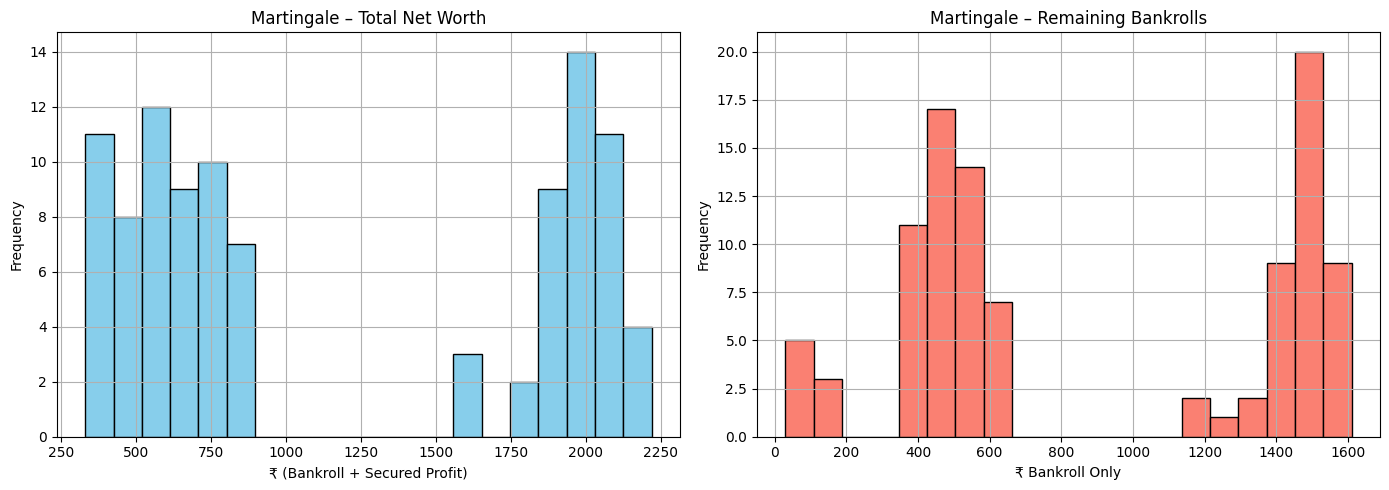

In [76]:
plot_strategy_results(profits, bankrolls, strategy_name="Martingale")


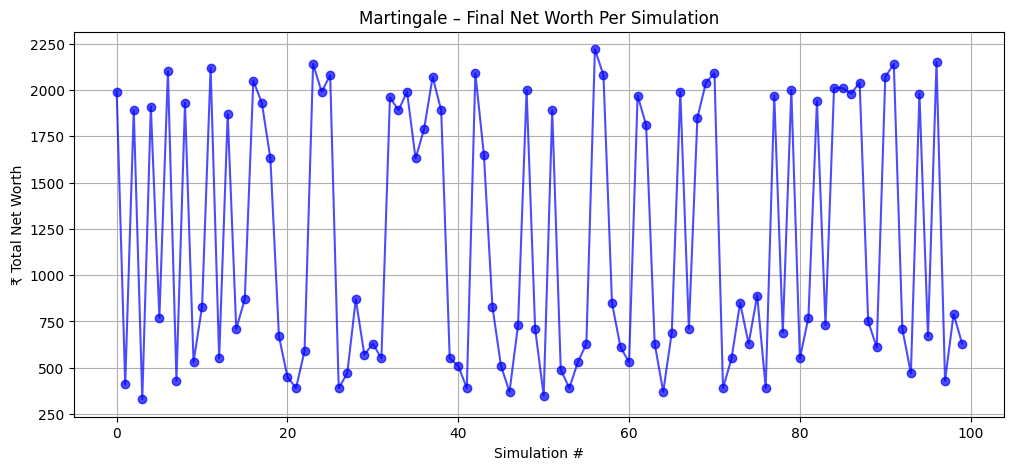

In [77]:
plot_final_profits(profits, strategy_name="Martingale")


In [78]:
#A func that gives summary of everything done
def print_summary(profits, bankrolls, name):
    print(f"\n {name} Summary")
    print(f" Total Runs: {len(profits)}")
    print(f" Mean Final Net Worth: ₹{np.mean(profits):.2f}")
    print(f" Mean Bankroll Left: ₹{np.mean(bankrolls):.2f}")
    print(f" Ruin Rate (Bankroll ≤ 0): {(np.array(bankrolls) <= 0).mean() * 100:.2f}%")
    print(f" Std Dev (Risk): ₹{np.std(profits):.2f}")


In [79]:
profits_flat, bankrolls_flat = simulation(flat_betting, n_simulations=500)

print_summary(profits, bankrolls, "Martingale")
print_summary(profits_flat, bankrolls_flat, "Flat Betting")



 Martingale Summary
 Total Runs: 100
 Mean Final Net Worth: ₹1187.10
 Mean Bankroll Left: ₹879.30
 Ruin Rate (Bankroll ≤ 0): 0.00%
 Std Dev (Risk): ₹697.71

 Flat Betting Summary
 Total Runs: 500
 Mean Final Net Worth: ₹973.24
 Mean Bankroll Left: ₹973.24
 Ruin Rate (Bankroll ≤ 0): 0.00%
 Std Dev (Risk): ₹100.88


In [82]:
def anti_martingale_strategy(player, base_bet=10, max_bet=640, max_rounds=100, max_wins_in_a_row=3, verbose=False):
    """
    Anti-Martingale strategy – doubles bet after each win, resets after a loss or after reaching win streak.
    Secures profit after hitting `max_wins_in_a_row`.

    Parameters:
    - player: Player object
    - base_bet: starting bet
    - max_bet: table bet cap
    - max_rounds: number of spins
    - max_wins_in_a_row: how many wins before profit is locked
    - verbose: if True, prints first 10 rounds only
    """
    bet_amount = base_bet
    win_streak = 0
    player.secured_profit = 0

    for i in range(max_rounds):
        if bet_amount > max_bet:
            if verbose and i < 10:
                print(f"⚠️ Round {i+1}: Bet ₹{bet_amount} exceeds max, resetting to ₹{base_bet}.")
            bet_amount = base_bet
            win_streak = 0

        if player.bankroll < bet_amount:
            if verbose and i < 10:
                print(f"💸 Round {i+1}: Bankroll ₹{player.bankroll} too low for bet ₹{bet_amount}, stopping.")
            break

        spin = spin_wheel()
        result = evaluate_red_black_bet(spin, 'red', bet_amount)
        desc = f"Round {i+1}: Bet ₹{bet_amount} on red, Spin = {spin}"
        player.place_bet(result, desc)

        if result > 0:
            win_streak += 1
            if win_streak >= max_wins_in_a_row:
                player.secured_profit += base_bet
                if verbose and i < 10:
                    print(f"✅ Round {i+1}: Hit {win_streak} wins → Locked ₹{base_bet} profit.")
                bet_amount = base_bet
                win_streak = 0
            else:
                bet_amount *= 2
                if verbose and i < 10:
                    print(f"✅ Round {i+1}: Win → Next bet ₹{bet_amount}")
        else:
            if verbose and i < 10:
                print(f"❌ Round {i+1}: Loss → Resetting to ₹{base_bet}")
            bet_amount = base_bet
            win_streak = 0


📊 Anti-Martingale(Win Cap) Summary
 Total Simulations: 500
 Mean Final Net Worth: ₹1029.90
 Std Dev (Risk): ₹218.74
 Mean Remaining Bankroll: ₹963.12
 Ruin Rate (Bankroll ≤ 0): 0.00%
--------------------------------------------------


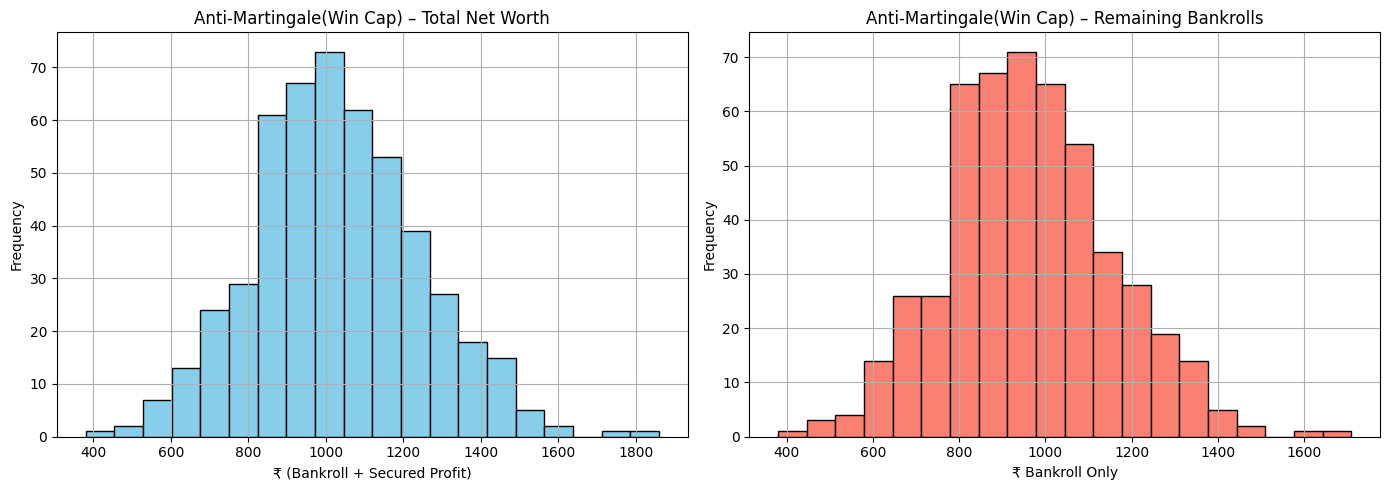

In [83]:
profit_am,bankrolls_am=simulation(anti_martingale_strategy,n_simulations=500)
plot_strategy_results(profit_am,bankrolls_am,strategy_name="Anti-Martingale(Win Cap)")

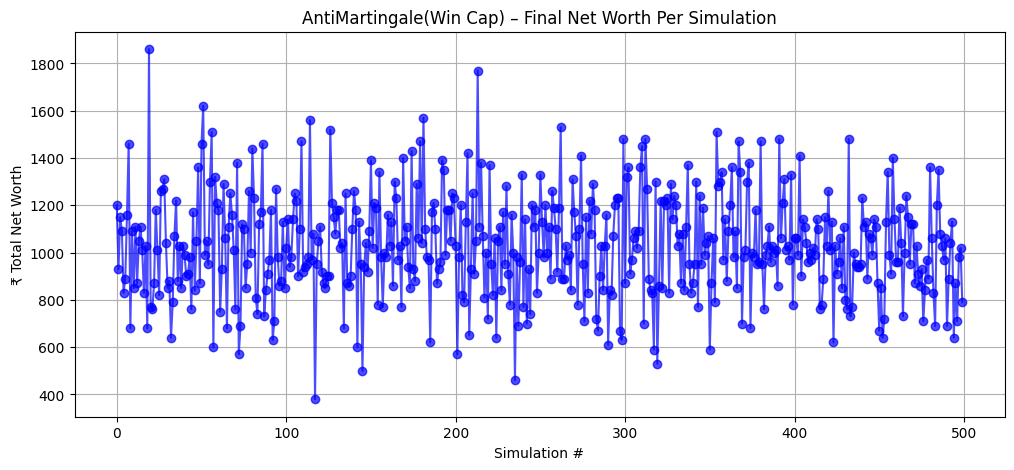


 AntiMartingale(Win Cap) Summary
 Total Runs: 500
 Mean Final Net Worth: ₹1029.90
 Mean Bankroll Left: ₹963.12
 Ruin Rate (Bankroll ≤ 0): 0.00%
 Std Dev (Risk): ₹218.74


In [84]:
plot_final_profits(profit_am,strategy_name="AntiMartingale(Win Cap)")
print_summary(profit_am,bankrolls_am,"AntiMartingale(Win Cap)")

In [86]:
def kelly_strategy_general(
    player,
    bet_func,
    bet_args=(),
    p_win=0.5,
    b=1,
    base_bet=10,
    max_rounds=100,
    verbose=False
):
    """
    General Kelly strategy for any betting function.

    Parameters:
    - player: Player instance
    - bet_func: function(spin_result, *args, amount) → return profit/loss
    - bet_args: args to pass to the bet_func (excluding spin and amount)
    - p_win: Probability of winning
    - b: Net odds received (e.g. 1 for even-money)
    - base_bet: Minimum amount to bet
    - max_rounds: Number of rounds
    - verbose: If True, prints only first 10 rounds
    """
    f = (b * p_win - (1 - p_win)) / b

    if f <= 0:
        if verbose:
            print("Kelly fraction is negative. No bets placed.")
        return

    player.secured_profit = 0

    for i in range(max_rounds):
        if player.bankroll < base_bet:
            if verbose and i < 10:
                print(f"Round {i+1}: Bankroll ₹{player.bankroll:.2f} below base bet ₹{base_bet}, stopping.")
            break

        bet_amount = f * player.bankroll
        bet_amount = max(base_bet, min(bet_amount, player.bankroll))

        spin = spin_wheel()
        result = bet_func(spin, *bet_args, amount=bet_amount)
        desc = f"Round {i+1}: Bet ₹{bet_amount:.2f} with Kelly on {bet_args}, Spin = {spin}"
        player.place_bet(result, desc)

        if result > 0:
            player.secured_profit += result

        if verbose and i < 10:
            print(f"Round {i+1}: Bet ₹{bet_amount:.2f}, Result ₹{result:.2f}, Bankroll ₹{player.bankroll:.2f}")



In [87]:
#Only bet on red in red black thing
player = Player(bankroll=1000)
kelly_strategy_general(
    player,
    bet_func=evaluate_red_black_bet,
    bet_args=('red',),    
    p_win=18/37,
    b=1,
    base_bet=10,
    max_rounds=100
)


In [88]:
# Single number like betting on 17
player = Player(bankroll=1000)
kelly_strategy_general(
    player,
    bet_func=straight_bet,
    bet_args=(17,),      
    p_win=1/37,  
    b=35,
    base_bet=10,
    max_rounds=100
)


📊 Kelly – Biased Red (60%) Summary
 Total Simulations: 500
 Mean Final Net Worth: ₹7396.66
 Std Dev (Risk): ₹10709.72
 Mean Remaining Bankroll: ₹489.17
 Ruin Rate (Bankroll ≤ 0): 0.00%
--------------------------------------------------


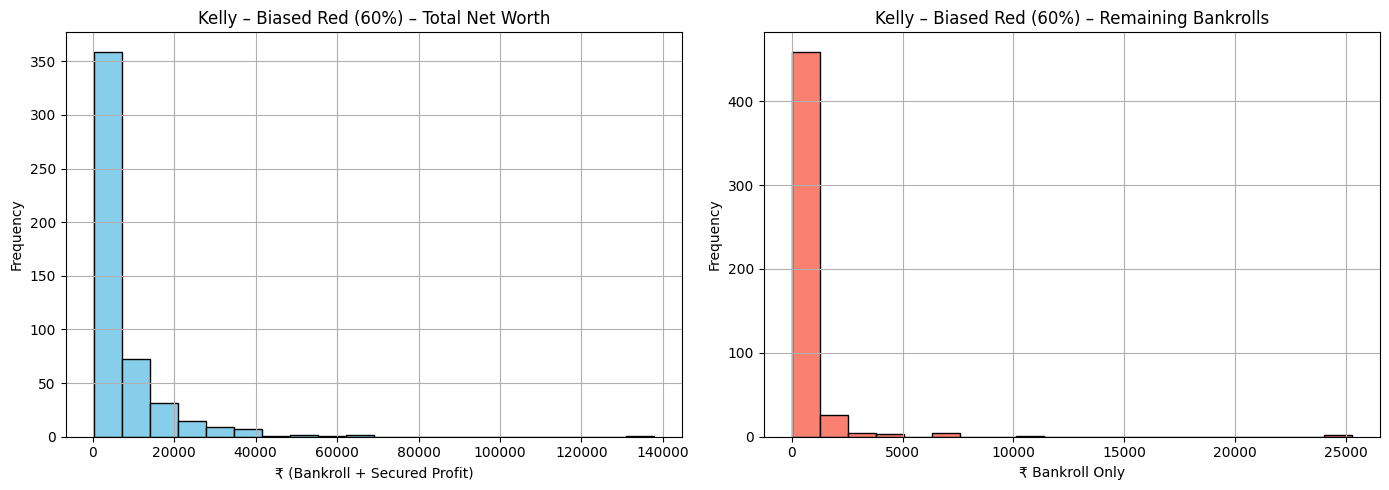

In [89]:
#Kelly frac being positive for rigged wheel
profits, bankrolls = simulation(
    strategy=lambda p: kelly_strategy_general(
        p,
        bet_func=evaluate_red_black_bet,
        bet_args=('red',),
        p_win=0.6,
        b=1,
        base_bet=10,
        max_rounds=100
    ),
    n_simulations=500
)
plot_strategy_results(profits, bankrolls, strategy_name="Kelly – Biased Red (60%)")


In [96]:
def compare_strategies(strategies, n_simulations=500):
    results = {}

    for name, strategy_fn in strategies.items():
        profits, bankrolls = simulation(strategy_fn, n_simulations=n_simulations)
        mean_profit = np.mean(profits)
        median_profit = np.median(profits)
        std_profit = np.std(profits)
        ruin_rate = np.mean(np.array(bankrolls) <= 0)
        
        results[name] = {
            'profits': profits,
            'bankrolls': bankrolls,
            'mean': mean_profit,
            'median': median_profit,
            'std': std_profit,
            'ruin_rate': ruin_rate
        }
        
        print(f" {name} Summary")
        print(f"Total Runs: {n_simulations}")
        print(f"Mean Final Net Worth: ₹{mean_profit:.2f}")
        print(f"Median Final Net Worth: ₹{median_profit:.2f}")
        print(f"Std Dev: ₹{std_profit:.2f}")
        print(f"Ruin Rate: {ruin_rate*100:.2f}%")
        print("-" * 40)

    return results


In [97]:
def plot_all_results(results):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()
    
    for i, (name, data) in enumerate(results.items()):
        axs[i].hist(data['profits'], bins=20, edgecolor='black')
        axs[i].set_title(f"{name} – Final Net Worth")
        axs[i].set_xlabel("Net Worth (₹)")
        axs[i].set_ylabel("Frequency")
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()


 Flat Betting Summary
Total Runs: 500
Mean Final Net Worth: ₹968.72
Median Final Net Worth: ₹960.00
Std Dev: ₹99.27
Ruin Rate: 0.00%
----------------------------------------
 Martingale Summary
Total Runs: 500
Mean Final Net Worth: ₹1315.16
Median Final Net Worth: ₹1790.00
Std Dev: ₹714.19
Ruin Rate: 0.60%
----------------------------------------
 Anti-Martingale Summary
Total Runs: 500
Mean Final Net Worth: ₹1015.00
Median Final Net Worth: ₹1010.00
Std Dev: ₹228.35
Ruin Rate: 0.00%
----------------------------------------
 Kelly Criterion Summary
Total Runs: 500
Mean Final Net Worth: ₹1000.00
Median Final Net Worth: ₹1000.00
Std Dev: ₹0.00
Ruin Rate: 0.00%
----------------------------------------


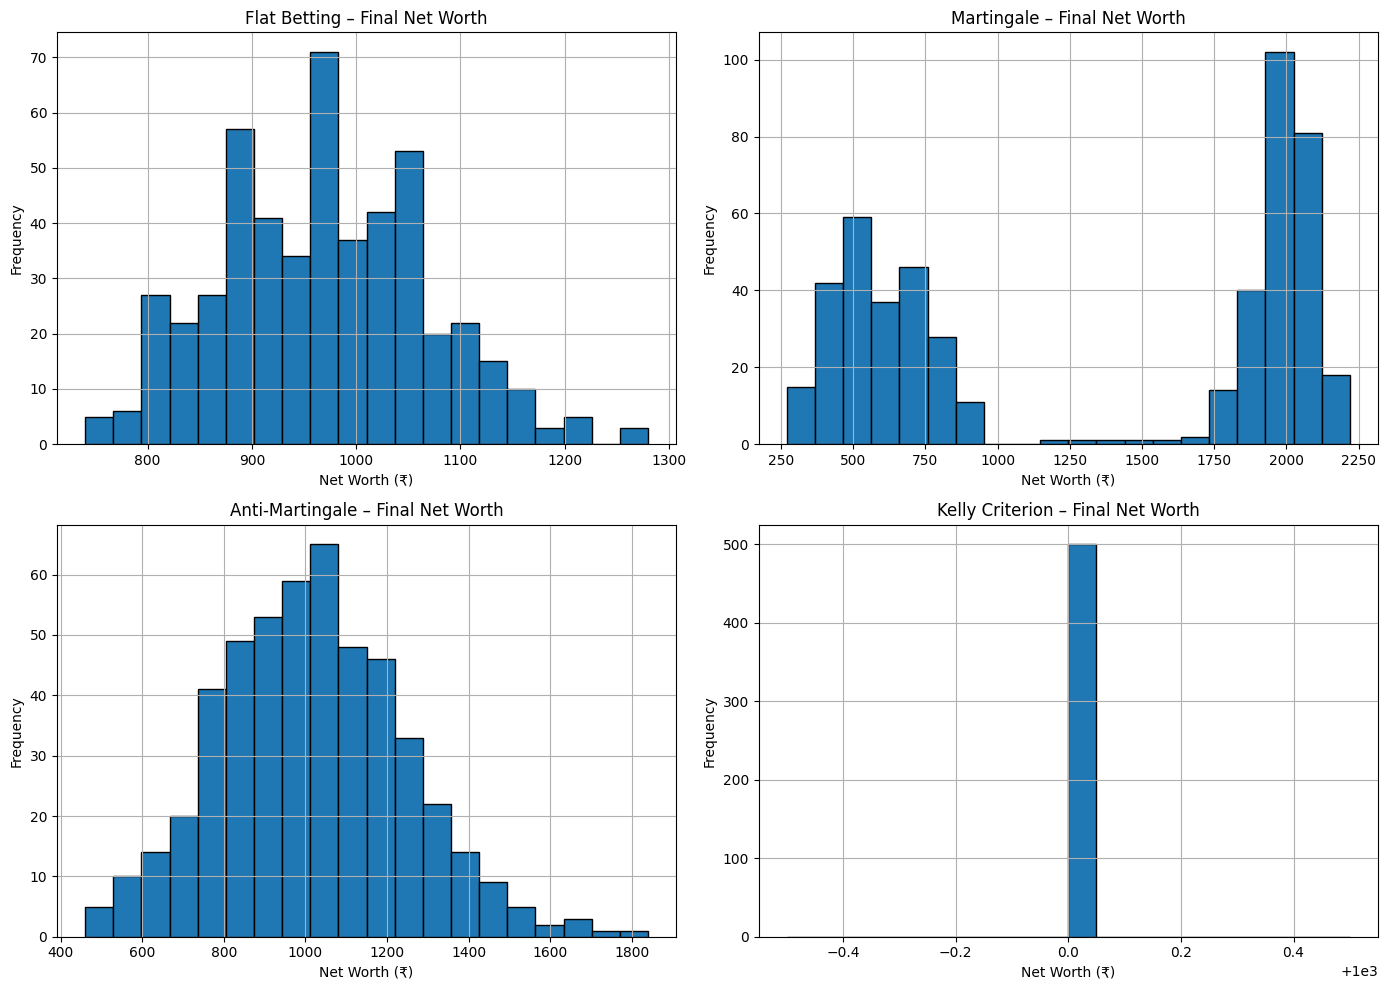

In [98]:
#Plotting for the below stratgy , we see that , kelly gives 0 as f is -ve
strategies = {
    "Flat Betting": lambda p: flat_betting(p, n_rounds=100, amount=10, bet_type='red'),
    "Martingale": martingale_strategy,
    "Anti-Martingale": anti_martingale_strategy,
    "Kelly Criterion": lambda p: kelly_strategy_general(
        p, evaluate_red_black_bet, p_win=18/37, b=1, base_bet=10, max_rounds=100
    )
}

results = compare_strategies(strategies)
plot_all_results(results)


In [111]:
#Lets move on to move on to monte carlo simulation ofr stategies we have made
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation(strategy_func, n_trials=500, n_rounds=100):
    all_bankrolls = np.zeros((n_trials, n_rounds + 1))

    for trial in range(n_trials):
        player = Player(bankroll=1000)
        round_bankrolls = [player.bankroll]

        for round_num in range(n_rounds):
  
            spin = spin_wheel()
            result = evaluate_red_black_bet(spin, 'red', amount=10)
            player.place_bet(result)
            round_bankrolls.append(player.bankroll)

        all_bankrolls[trial] = round_bankrolls

    return all_bankrolls

In [112]:
# Plot mean + confidence bands
def plot_monte_carlo_results(all_bankrolls, strategy_name="Strategy"):
    rounds = np.arange(all_bankrolls.shape[1])
    mean = np.mean(all_bankrolls, axis=0)
    perc5 = np.percentile(all_bankrolls, 5, axis=0)
    perc95 = np.percentile(all_bankrolls, 95, axis=0)

    plt.figure(figsize=(12, 6))
    plt.plot(rounds, mean, label="Mean Bankroll", color='blue')
    plt.fill_between(rounds, perc5, perc95, color='skyblue', alpha=0.4, label="5–95% Confidence Interval")
    plt.title(f"Monte Carlo Simulation – {strategy_name}")
    plt.xlabel("Round Number")
    plt.ylabel("Bankroll")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [113]:
#To plot people going bankrupt over time 
def plot_ruin_probabilities(all_bankrolls):
    ruin = (all_bankrolls <= 0).astype(int)
    ruin_rate_by_round = ruin.mean(axis=0)

    plt.figure(figsize=(10, 5))
    plt.plot(ruin_rate_by_round, color='red', label='Ruin Probability')
    plt.xlabel("Round Number")
    plt.ylabel("Probability of Ruin")
    plt.title("Ruin Probability Over Time")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


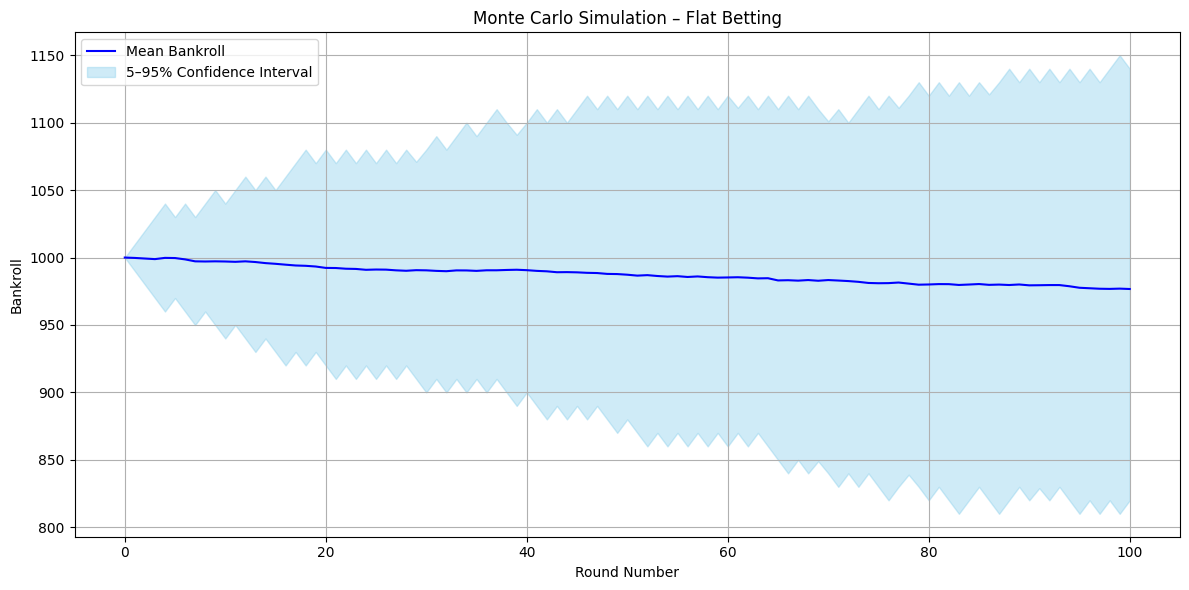

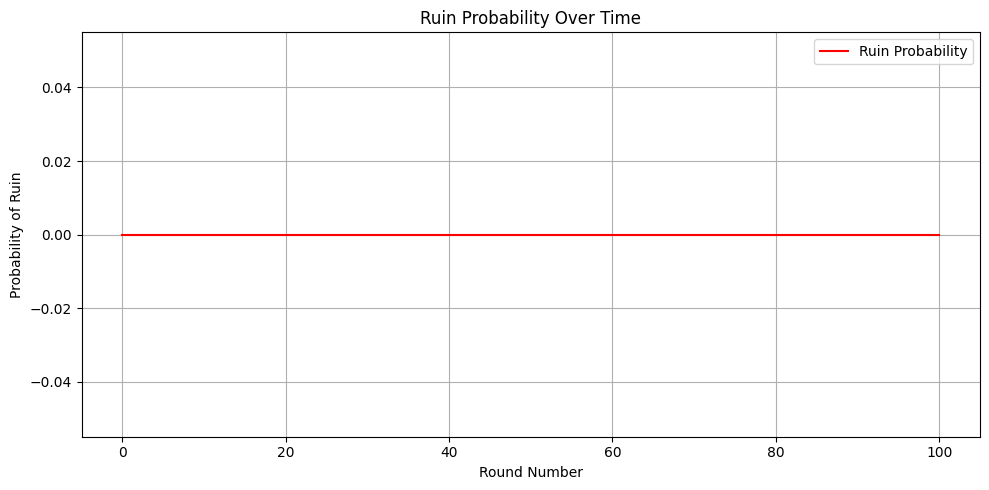

In [114]:
all_bankrolls = monte_carlo_simulation(...)
plot_monte_carlo_results(all_bankrolls, "Flat Betting")
plot_ruin_probabilities(all_bankrolls)


In [116]:
#We get a slightly dec mean bankroll line because of house edge the dist is still very sym about 1000 line, also we never go bankrup as its flat betting so we will need a lot of rounds to reach 0 

In [118]:
#The blue shaded part is defined as area which means bank roll of 5 to 95 of simulations in each rond lie in that area, as round inc the band become more and more wider hence
#less stabiulty as start narrow band so more stability


In [121]:
def monte_carlo_martingale(n_trials=500, n_rounds=100, base_bet=10, max_bet=640):
    all_bankrolls = np.zeros((n_trials, n_rounds + 1))

    for trial in range(n_trials):
        player = Player(bankroll=1000)
        bankroll = [player.bankroll]
        current_bet = base_bet

        for round_num in range(n_rounds):
            if player.bankroll < current_bet:
                break  # Can't bet more than bankroll

            spin = spin_wheel()
            result = evaluate_red_black_bet(spin, 'red', amount=current_bet)
            player.place_bet(result)

            # ✅ FIX: check if result is win/loss
            if result > 0:
                current_bet = base_bet  # win → reset to base
            else:
                current_bet *= 2         # loss → double
                if current_bet > max_bet:
                    current_bet = base_bet  # optional reset

            bankroll.append(player.bankroll)

        # If game ends early, fill with last bankroll
        while len(bankroll) < n_rounds + 1:
            bankroll.append(player.bankroll)

        all_bankrolls[trial] = bankroll

    return all_bankrolls


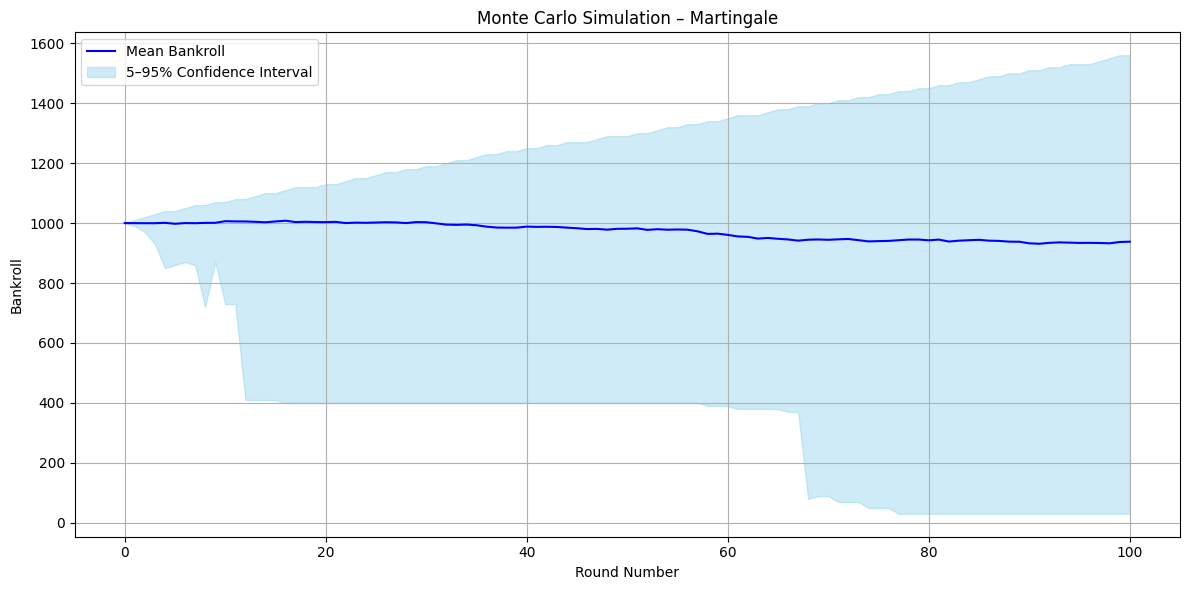

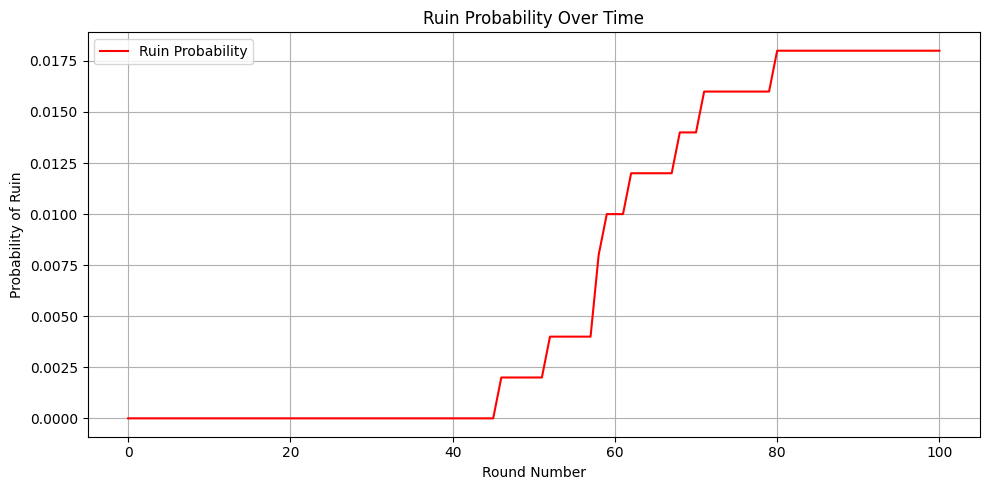

In [122]:
all_bankrolls_martingale = monte_carlo_martingale()
plot_monte_carlo_results(all_bankrolls_martingale, "Martingale")
plot_ruin_probabilities(all_bankrolls_martingale)


In [123]:
#WE  see that until round 45 nobody got ruined after than ruin rate syk rocketed to about 1.75 percent later on by 80th round
#We see a sharp drop in blue line due to ruined simulations in later rounds, 
#Early rounds : narrow band  - everyones has less bankroll 
#By the time it reaches round 80 lower edge goes down quickly to 0

In [142]:
def monte_carlo_anti_martingale(n_trials=500, n_rounds=100, base_bet=10, max_bet=640, max_wins_in_a_row=3):
    all_bankrolls = np.zeros((n_trials, n_rounds + 1))

    for trial in range(n_trials):
        player = Player(bankroll=1000)
        bankrolls = [player.bankroll]
        bet_amount = base_bet
        win_streak = 0

        for i in range(n_rounds):
            if bet_amount > max_bet:
                bet_amount = base_bet
                win_streak = 0

            if player.bankroll < bet_amount:
                break  # Can't continue

            spin = spin_wheel()
            result = evaluate_red_black_bet(spin, 'red', bet_amount)
            player.place_bet(result)

            if result > 0:
                win_streak += 1
                if win_streak >= max_wins_in_a_row:
                    player.secured_profit += base_bet
                    bet_amount = base_bet
                    win_streak = 0
                else:
                    bet_amount *= 2
            else:
                bet_amount = base_bet
                win_streak = 0

            bankrolls.append(player.bankroll)

        # Fill remaining rounds with final bankroll if ended early
        while len(bankrolls) < n_rounds + 1:
            bankrolls.append(player.bankroll)

        all_bankrolls[trial] = bankrolls

    return all_bankrolls
import pandas as pd

In [143]:
# def plot_ruin_probabilities(all_bankrolls):
#     ruin_df = pd.DataFrame(all_bankrolls == 0)
#     ruin_by_round = ruin_df.cummax(axis=1)
#     ruin_rate_by_round = ruin_by_round.mean(axis=0)

#     plt.figure(figsize=(12, 5))
#     plt.plot(ruin_rate_by_round, color='red', label='Ruin Probability')
#     plt.xlabel("Round Number")
#     plt.ylabel("Probability of Ruin")
#     plt.title("Ruin Probability Over Time")
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


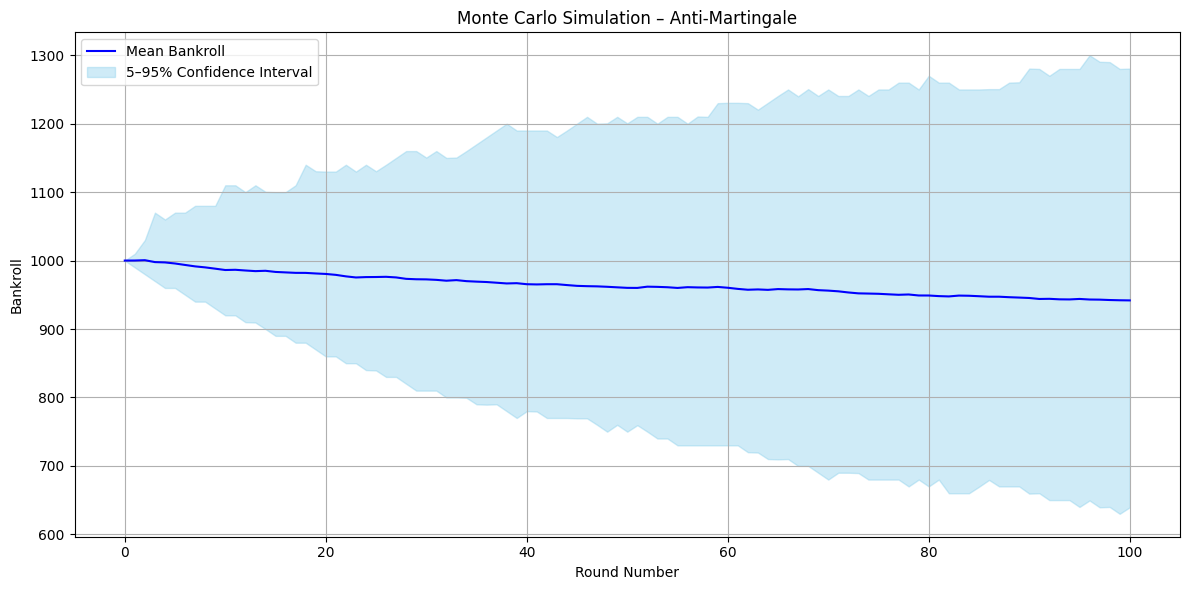

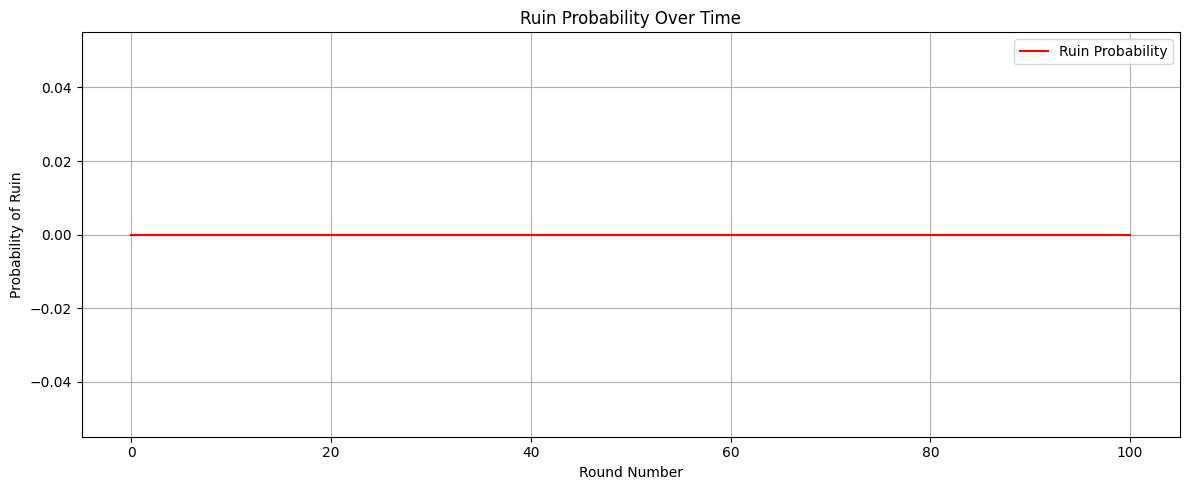

In [145]:
all_bankrolls_anti_martingale = monte_carlo_anti_martingale()
plot_monte_carlo_results(all_bankrolls_anti_martingale, "Anti-Martingale")
plot_ruin_probabilities(all_bankrolls_anti_martingale)


In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Flat Betting with real-world constraints
def flat_betting_realistic(n_trials=500, n_rounds=100, base_bet=10, min_bet=10, max_bet=500, stop_profit=500, stop_loss=500):
    all_bankrolls = np.zeros((n_trials, n_rounds + 1))

    for trial in range(n_trials):
        player = Player(bankroll=1000)
        bankroll = [player.bankroll]

        for round_num in range(n_rounds):
            if player.bankroll < min_bet:
                break  # can't bet anymore

            if base_bet > max_bet:
                bet_amt = max_bet
            elif base_bet < min_bet:
                bet_amt = min_bet
            else:
                bet_amt = base_bet

            spin = spin_wheel()
            result = evaluate_red_black_bet(spin, 'red', amount=bet_amt)
            player.place_bet(result)
            bankroll.append(player.bankroll)

            if player.secured_profit >= stop_profit:
                break
            if (1000 - player.bankroll) >= stop_loss:
                break

        while len(bankroll) < n_rounds + 1:
            bankroll.append(player.bankroll)

        all_bankrolls[trial] = bankroll

    return all_bankrolls



In [149]:
def martingale_realistic(n_trials=500, n_rounds=100, base_bet=10, max_bet=640, min_bet=10, stop_profit=500, stop_loss=500):
    all_bankrolls = np.zeros((n_trials, n_rounds + 1))

    for trial in range(n_trials):
        player = Player(bankroll=1000)
        bankroll = [player.bankroll]
        current_bet = base_bet

        for round_num in range(n_rounds):
            if player.bankroll < current_bet or current_bet > max_bet:
                break

            spin = spin_wheel()
            result = evaluate_red_black_bet(spin, 'red', amount=current_bet)
            player.place_bet(result)

            if result > 0:
                current_bet = base_bet
            else:
                current_bet = min(current_bet * 2, max_bet)

            bankroll.append(player.bankroll)

            if player.secured_profit >= stop_profit or (1000 - player.bankroll) >= stop_loss:
                break

        while len(bankroll) < n_rounds + 1:
            bankroll.append(player.bankroll)

        all_bankrolls[trial] = bankroll

    return all_bankrolls


In [152]:
def anti_martingale_realistic(n_trials=500, n_rounds=100, base_bet=10, max_bet=640, stop_profit=500, stop_loss=500):
    all_bankrolls = np.zeros((n_trials, n_rounds + 1))

    for trial in range(n_trials):
        player = Player(bankroll=1000)
        bankrolls = [player.bankroll]
        bet_amount = base_bet
        win_streak = 0

        for i in range(n_rounds):
            if player.secured_profit >= stop_profit or player.bankroll <= 1000 - stop_loss:
                break  # Stop conditions met

            if bet_amount > max_bet:
                bet_amount = base_bet
                win_streak = 0

            if player.bankroll < bet_amount:
                break  # Can't continue

            spin = spin_wheel()
            result = evaluate_red_black_bet(spin, 'red', bet_amount)
            player.place_bet(result)

            if result > 0:
                win_streak += 1
                if win_streak >= 3:
                    player.secured_profit += base_bet
                    bet_amount = base_bet
                    win_streak = 0
                else:
                    bet_amount *= 2
            else:
                bet_amount = base_bet
                win_streak = 0

            bankrolls.append(player.bankroll)

        while len(bankrolls) < n_rounds + 1:
            bankrolls.append(player.bankroll)

        all_bankrolls[trial] = bankrolls

    return all_bankrolls


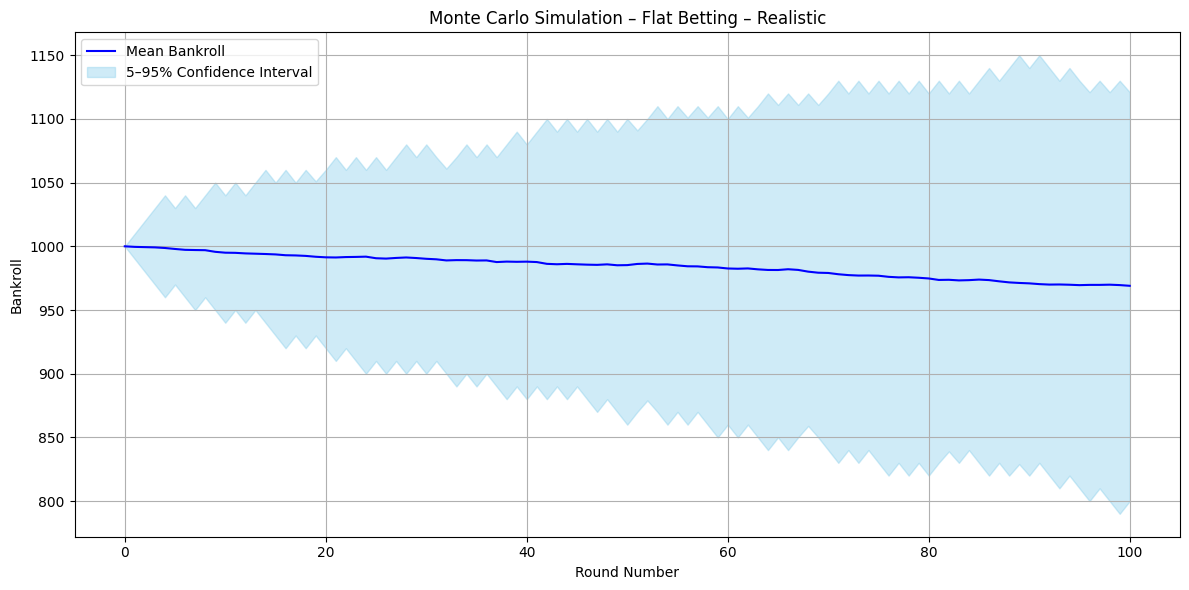

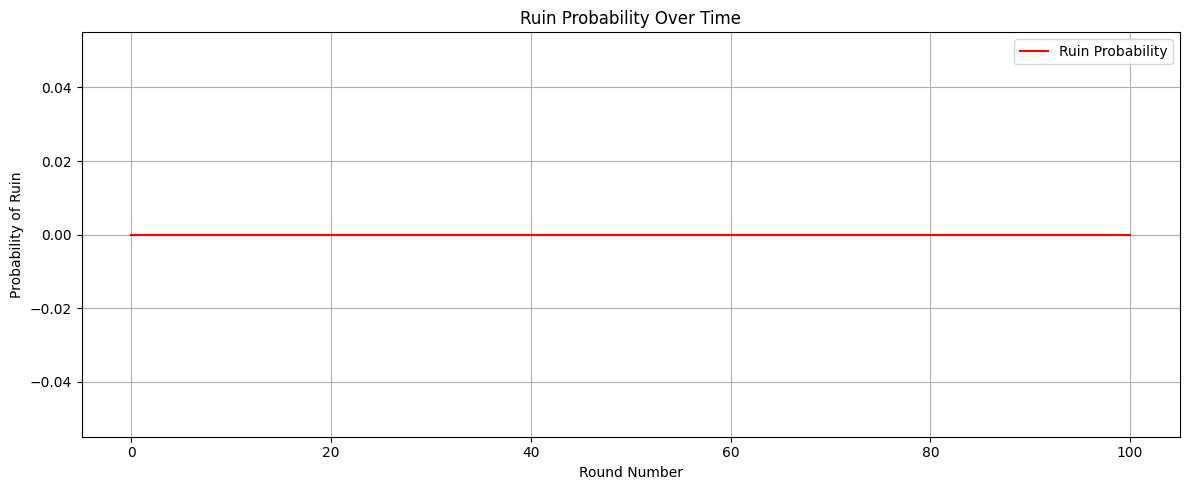

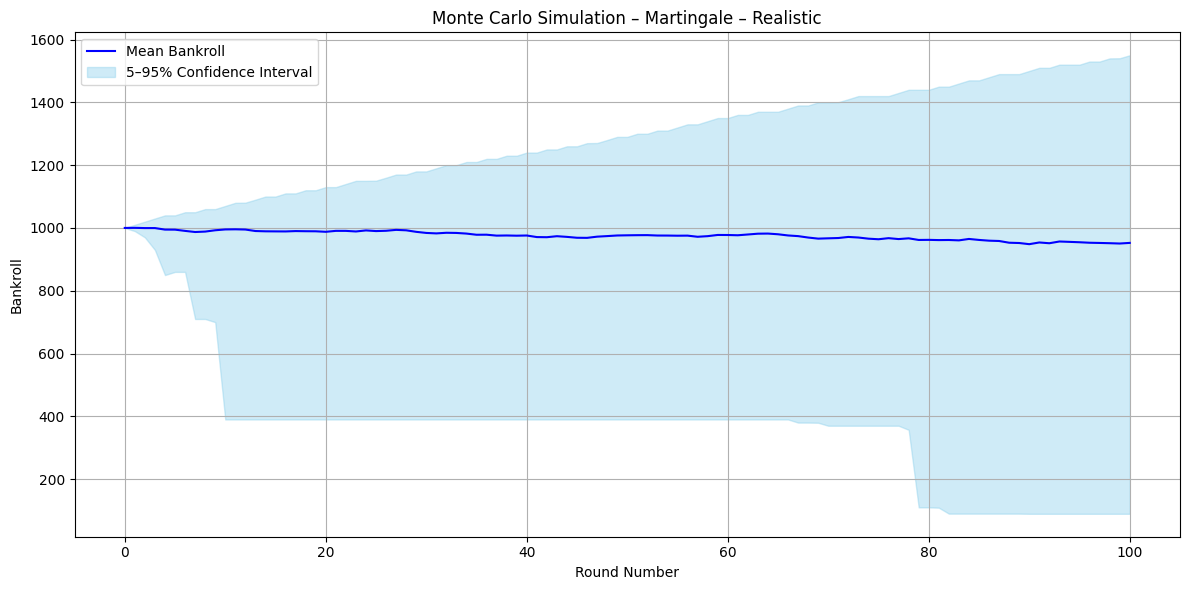

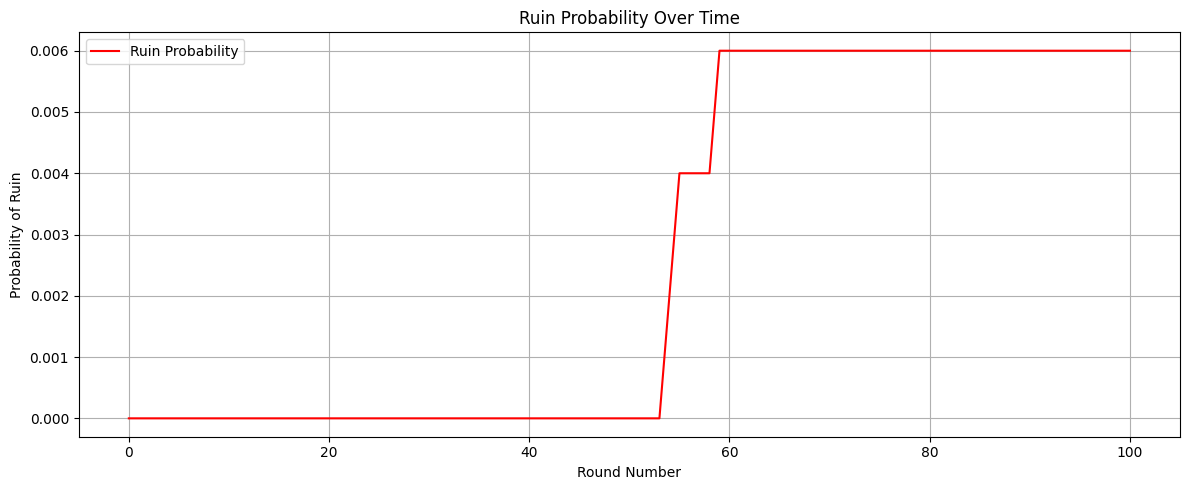

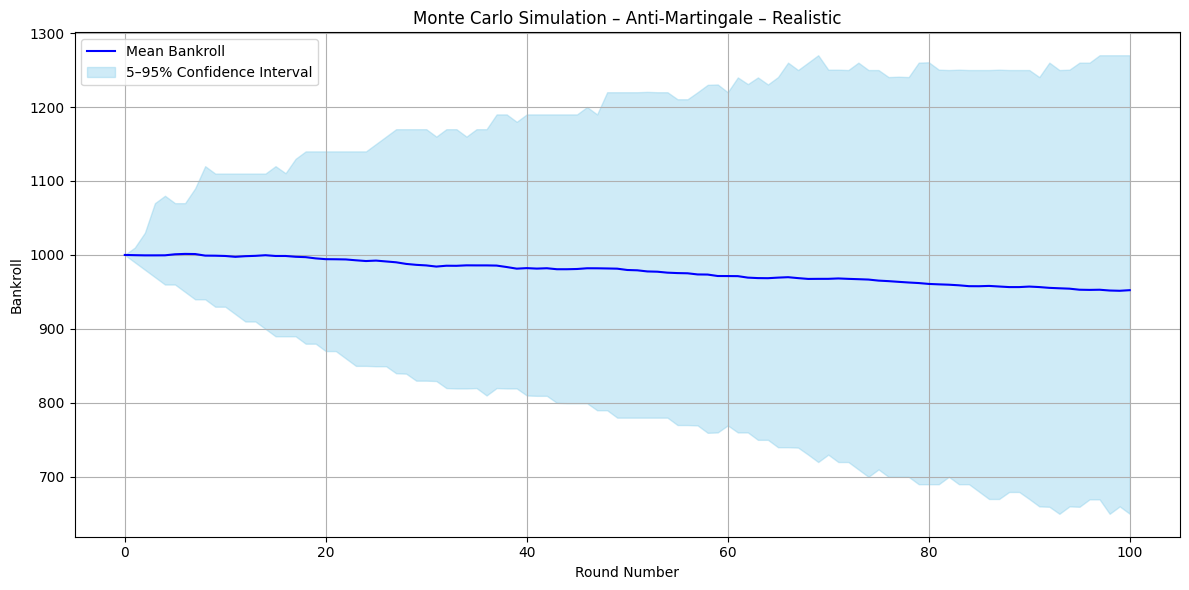

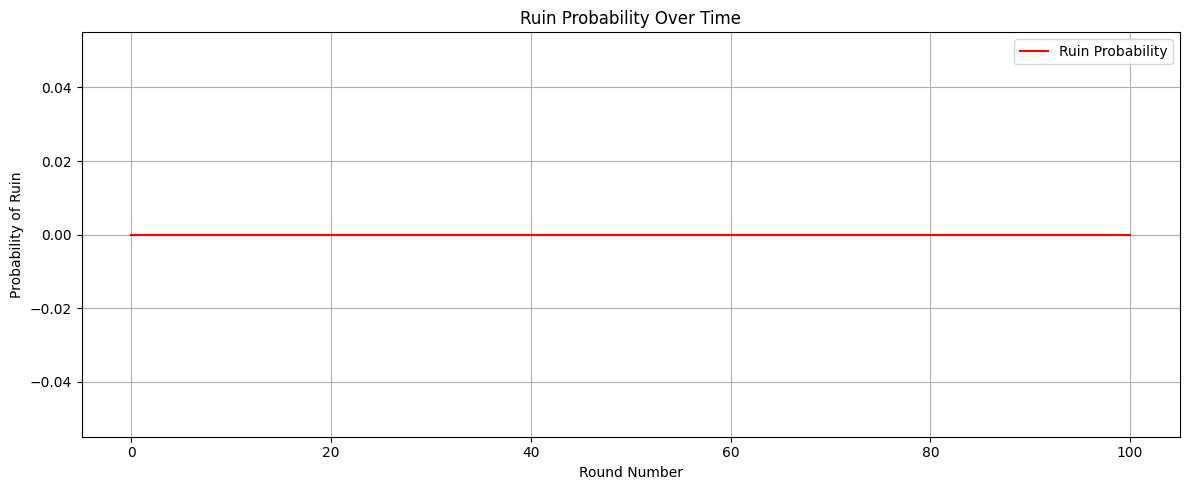

In [158]:
# To visualize
all_flat = flat_betting_realistic()
plot_monte_carlo_results(all_flat, "Flat Betting – Realistic")
plot_ruin_probabilities(all_flat)

all_marti = martingale_realistic()
plot_monte_carlo_results(all_marti, "Martingale – Realistic")
plot_ruin_probabilities(all_marti)

all_anti = anti_martingale_realistic()
plot_monte_carlo_results(all_anti, "Anti-Martingale – Realistic")
plot_ruin_probabilities(all_anti)


In [159]:
#Prob of ruin dec drasitcally in martingale from 1.75 to 0.6 percent in this case
#In the anti maritingale it dec even more to 0 directly as in this case because we limit loss so it never reaches the cap we have set, and our betting size is small